<a href="https://colab.research.google.com/github/MohamedElsayed002/Machine_Learning/blob/master/SuperMarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sales = pd.read_csv('./supermarket_sales - Sheet1.csv')

In [4]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

By inspection, the 'Date' datatype is an object, we need to change it to datatime

In [6]:
sales['date'] = pd.to_datetime(sales['Date'])

In [8]:
sales['date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [9]:
sales['date'].dtype

dtype('<M8[ns]')

In [10]:
type(sales['date'])

pandas.core.series.Series

In [11]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [12]:
sales['Time'] = pd.to_datetime(sales['Time'])

<ipython-input-12-a47ac6c36b15>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [13]:
sales['Hour'] = (sales['Time']).dt.hour

In [14]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10


In [22]:
# Let's see the unique hours of sales in this dataset

sales['Hour'].nunique()

11

In [23]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int32)

In [24]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2024-07-12 15:24:41.880000,307.58738,4.761905,15.379369,6.97270,2019-02-14 00:05:45.600000,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2024-07-12 10:00:00,10.17000,4.761905,0.508500,4.00000,2019-01-01 00:00:00,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2024-07-12 12:43:00,118.49750,4.761905,5.924875,5.50000,2019-01-24 00:00:00,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2024-07-12 15:19:00,241.76000,4.761905,12.088000,7.00000,2019-02-13 00:00:00,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2024-07-12 18:15:00,448.90500,4.761905,22.445250,8.50000,2019-03-08 00:00:00,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2024-07-12 20:59:00,993.00000,4.761905,49.650000,10.00000,2019-03-30 00:00:00,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858,NaN,8.693563,0.835254,0.0,3.186857


Let's find the number of unique values in columns with object datatype

In [25]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [27]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [32]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


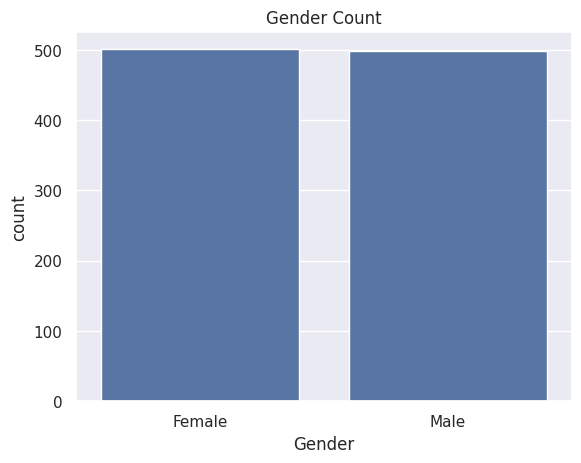

In [35]:
sns.set(style="darkgrid")

genderCount = sns.countplot(x='Gender',data=sales).set_title('Gender Count')

Text(0.5, 1.0, 'Ratings by branch')

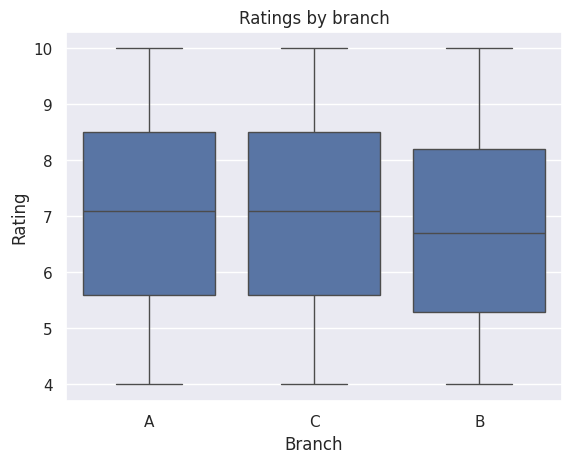

In [37]:
sns.boxplot(x = 'Branch', y='Rating',data=sales).set_title('Ratings by branch')

Branch B has the lowest rating among all the branches

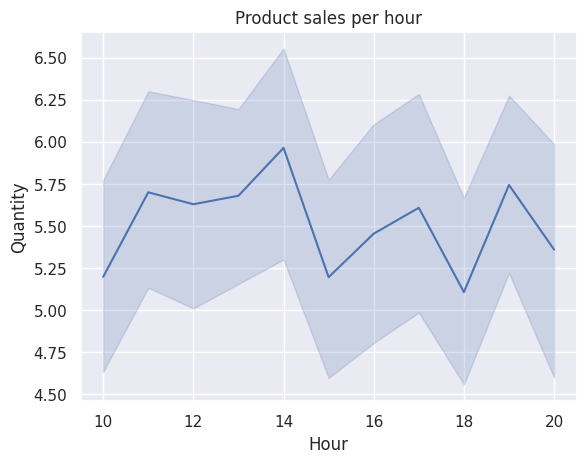

In [41]:
genderCount = sns.lineplot(x='Hour',y='Quantity',data=sales).set_title('Product sales per hour')

Sales by the hour in the company Most of the item were sold around 14:00 hrs local time

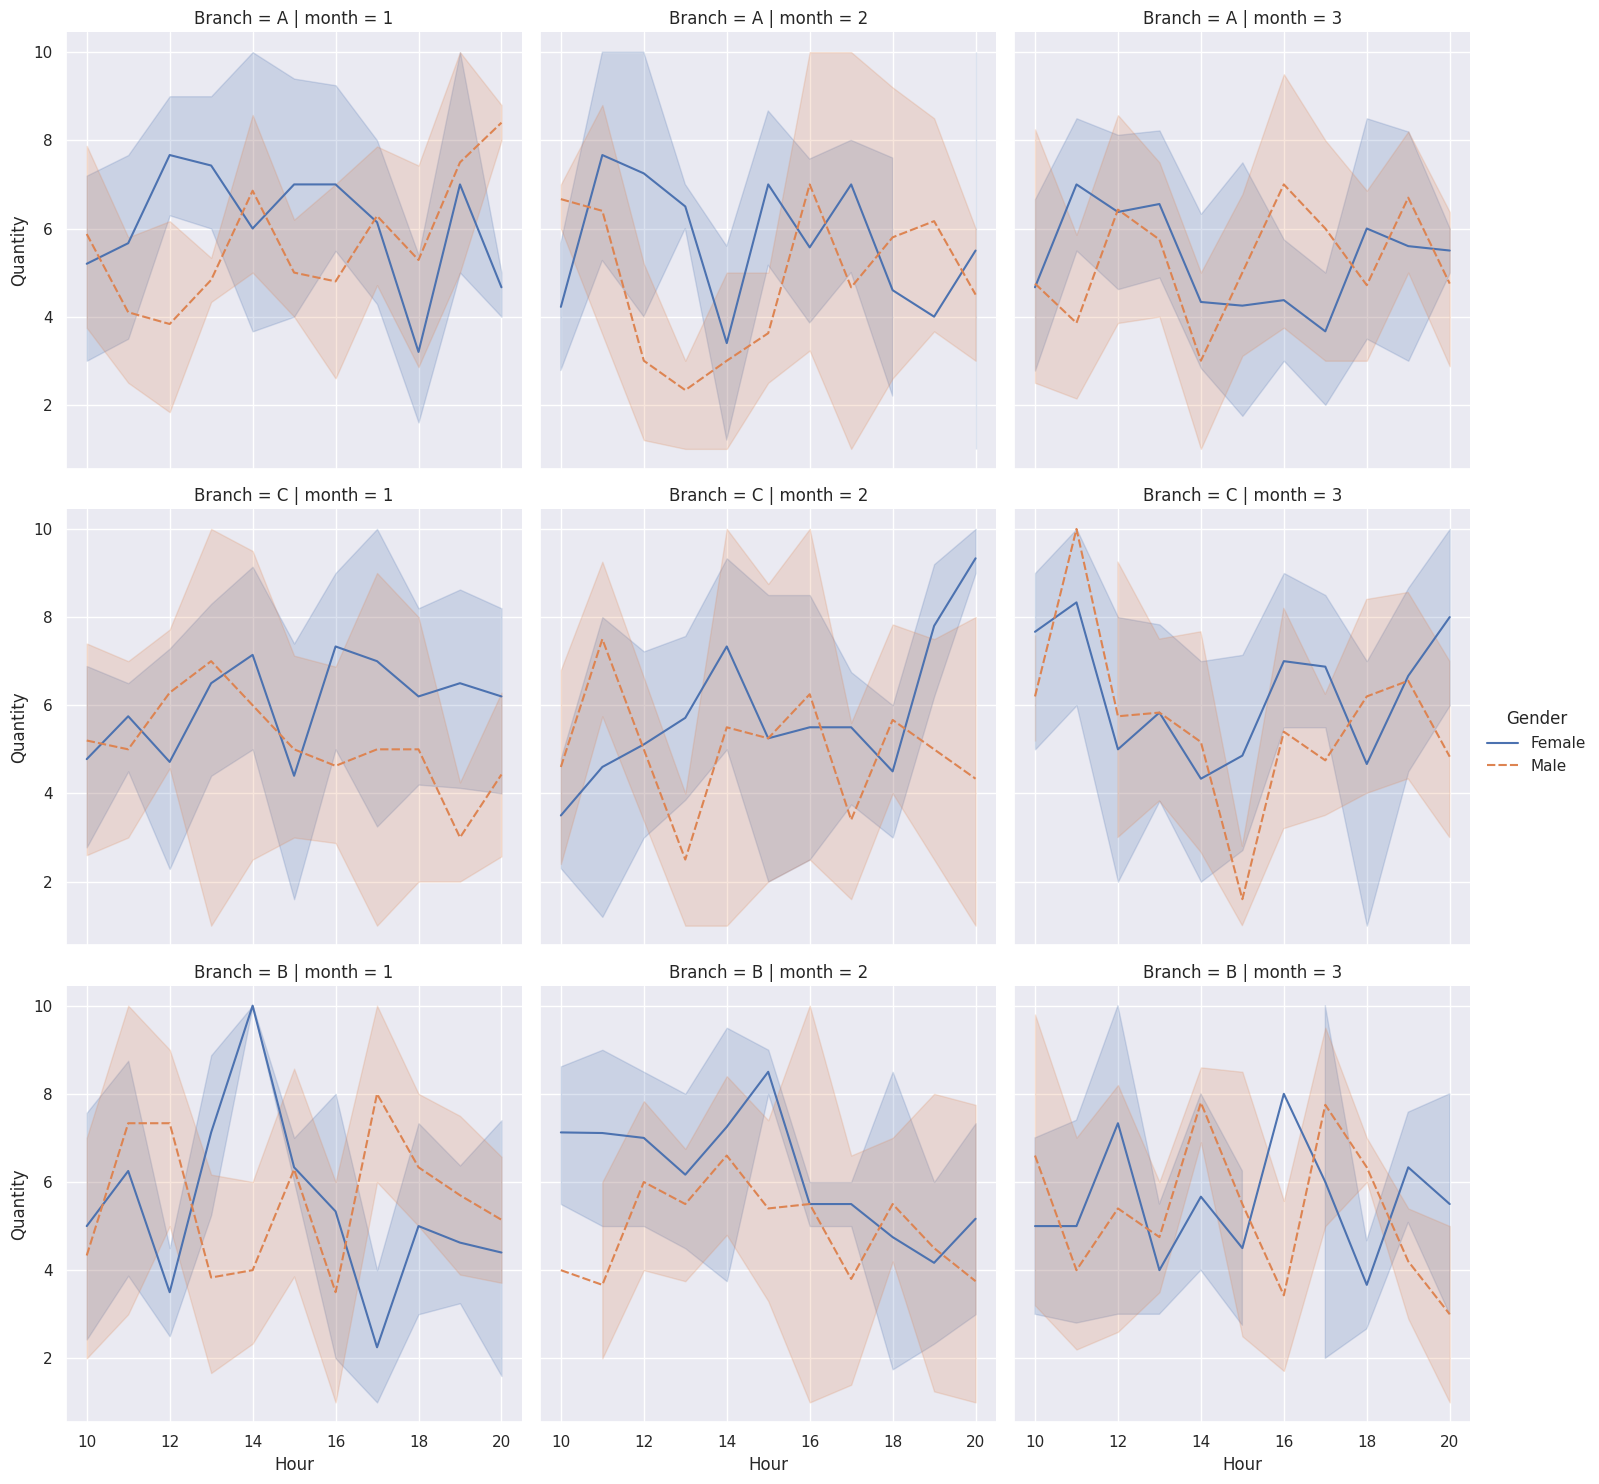

In [42]:
genderCount = sns.relplot(x='Hour',y='Quantity',col='month',row='Branch',kind='line',hue='Gender',style='Gender',data=sales)

Below we can see how each branch's sales quantity looks like by the hour in a monthly fashion

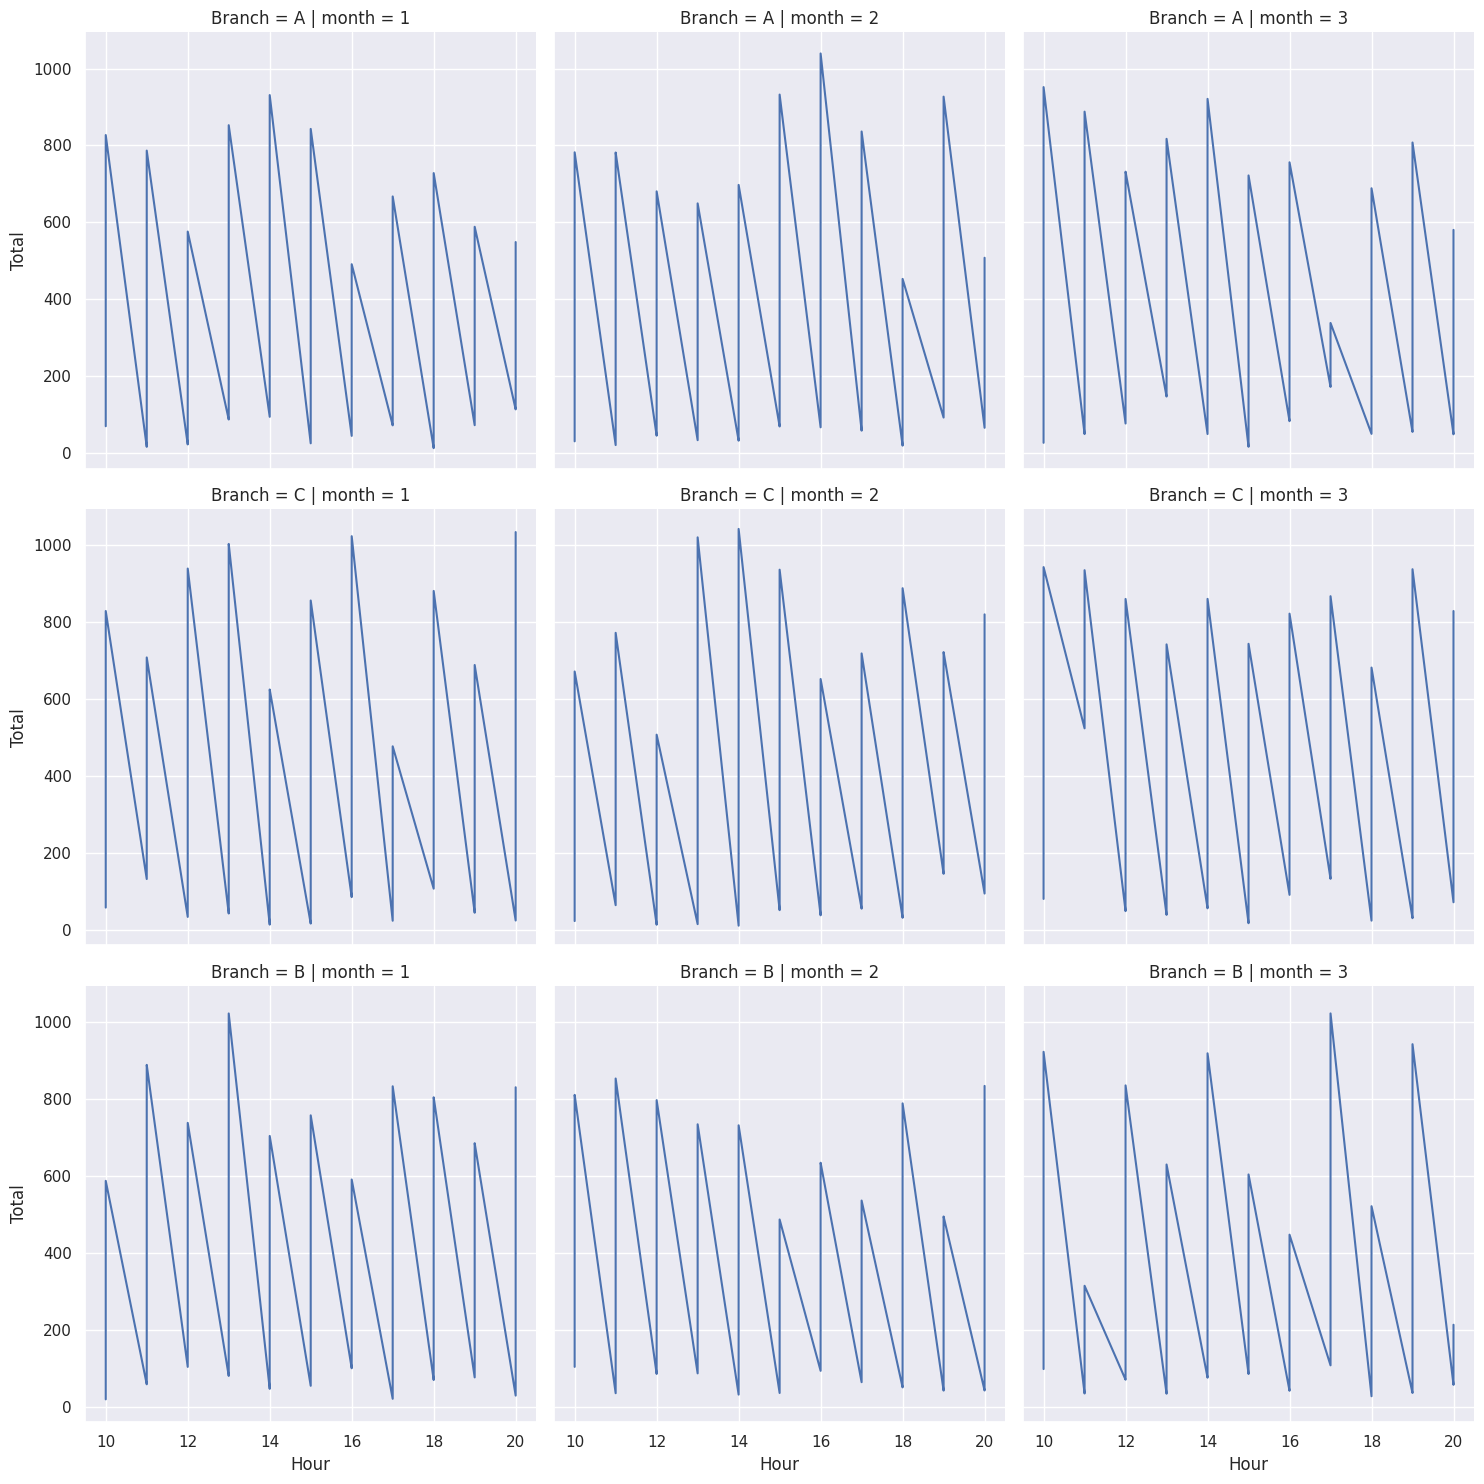

In [43]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

Below we can see each branch's sales by the hour in a monthly fashion

In [44]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

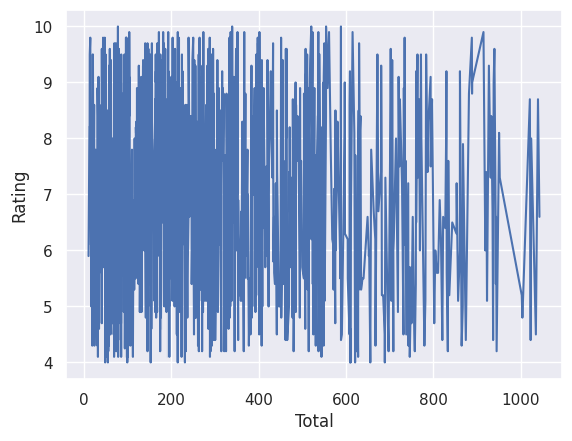

In [45]:
ageDisSpend = sns.lineplot(x='Total',y='Rating',data=sales)

In [47]:
sales['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

<Axes: xlabel='Quantity', ylabel='Product line'>

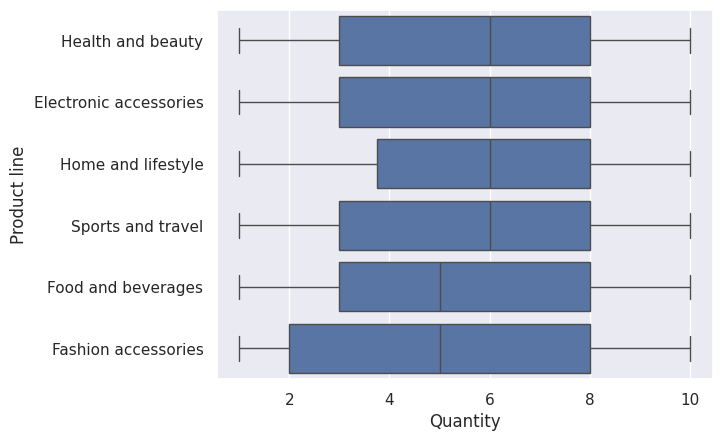

In [48]:
sns.boxplot(y='Product line',x='Quantity',data=sales)

From the above visual, Health and Beauty, Elctronic accessories, Home and lifestyle, Sport and Travel have a better average quantity sales that food and beverages as well as fashion accessories

<Axes: xlabel='count', ylabel='Product line'>

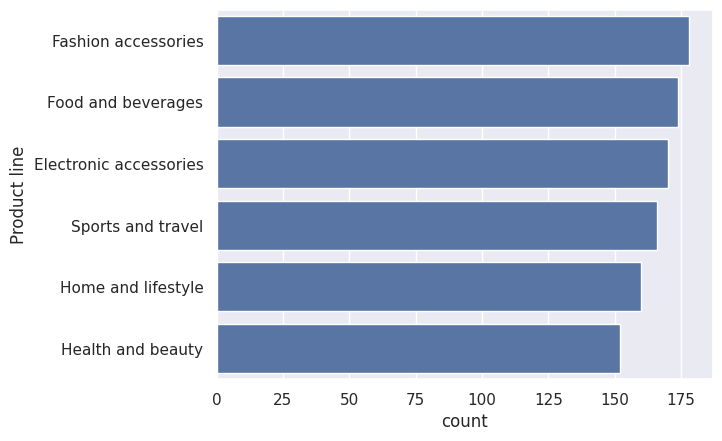

In [49]:
sns.countplot(y='Product line',data=sales, order=sales['Product line'].value_counts().index)

From the above image shows the top product line item type sold in the given dataset. fashion accessories is the highest while health and beauty is the lowest

<Axes: xlabel='Total', ylabel='Product line'>

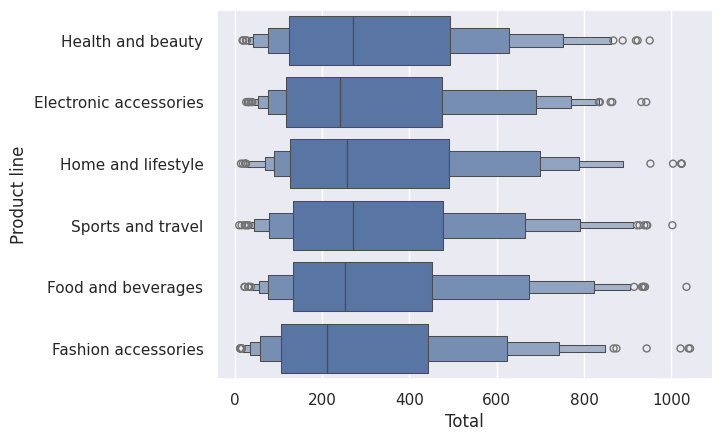

In [50]:
sns.boxenplot(y='Product line',x='Total',data=sales)

<Axes: xlabel='Total', ylabel='Product line'>

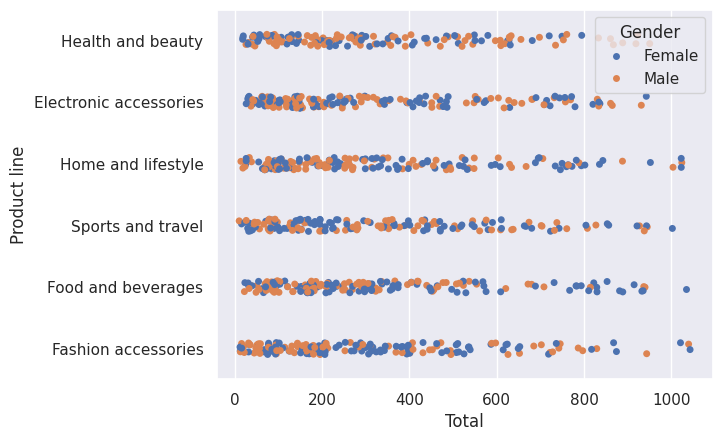

In [51]:
sns.stripplot(y='Product line',x='Total',hue='Gender',data=sales)

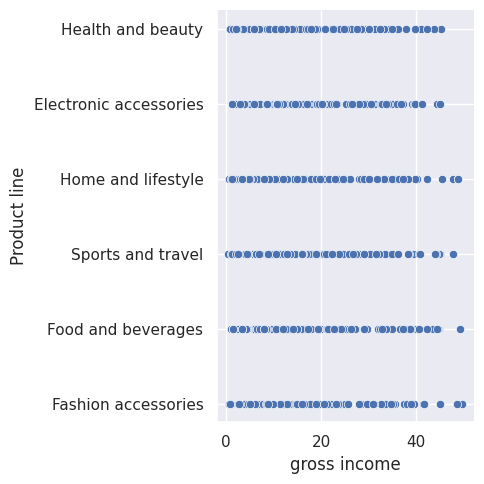

In [52]:
sns.relplot(y='Product line',x='gross income',data=sales)

<Axes: xlabel='Rating', ylabel='Product line'>

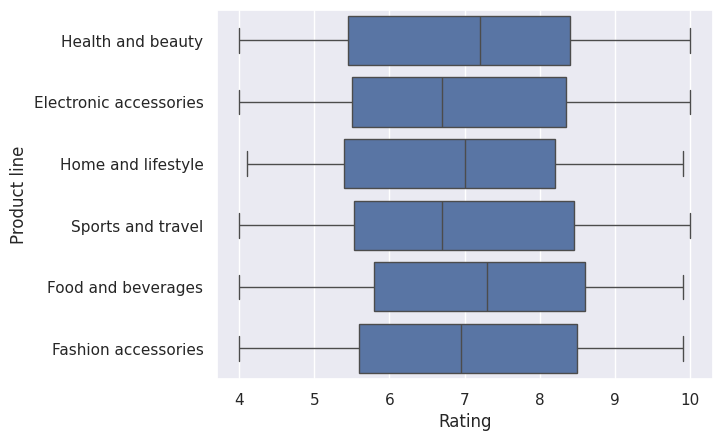

In [54]:
sns.boxplot(y='Product line',x='Rating',data=sales)

Food and Beverages have the higest average rating while sports and travel the lowest




Let's see when customers buy certain products in the various branches

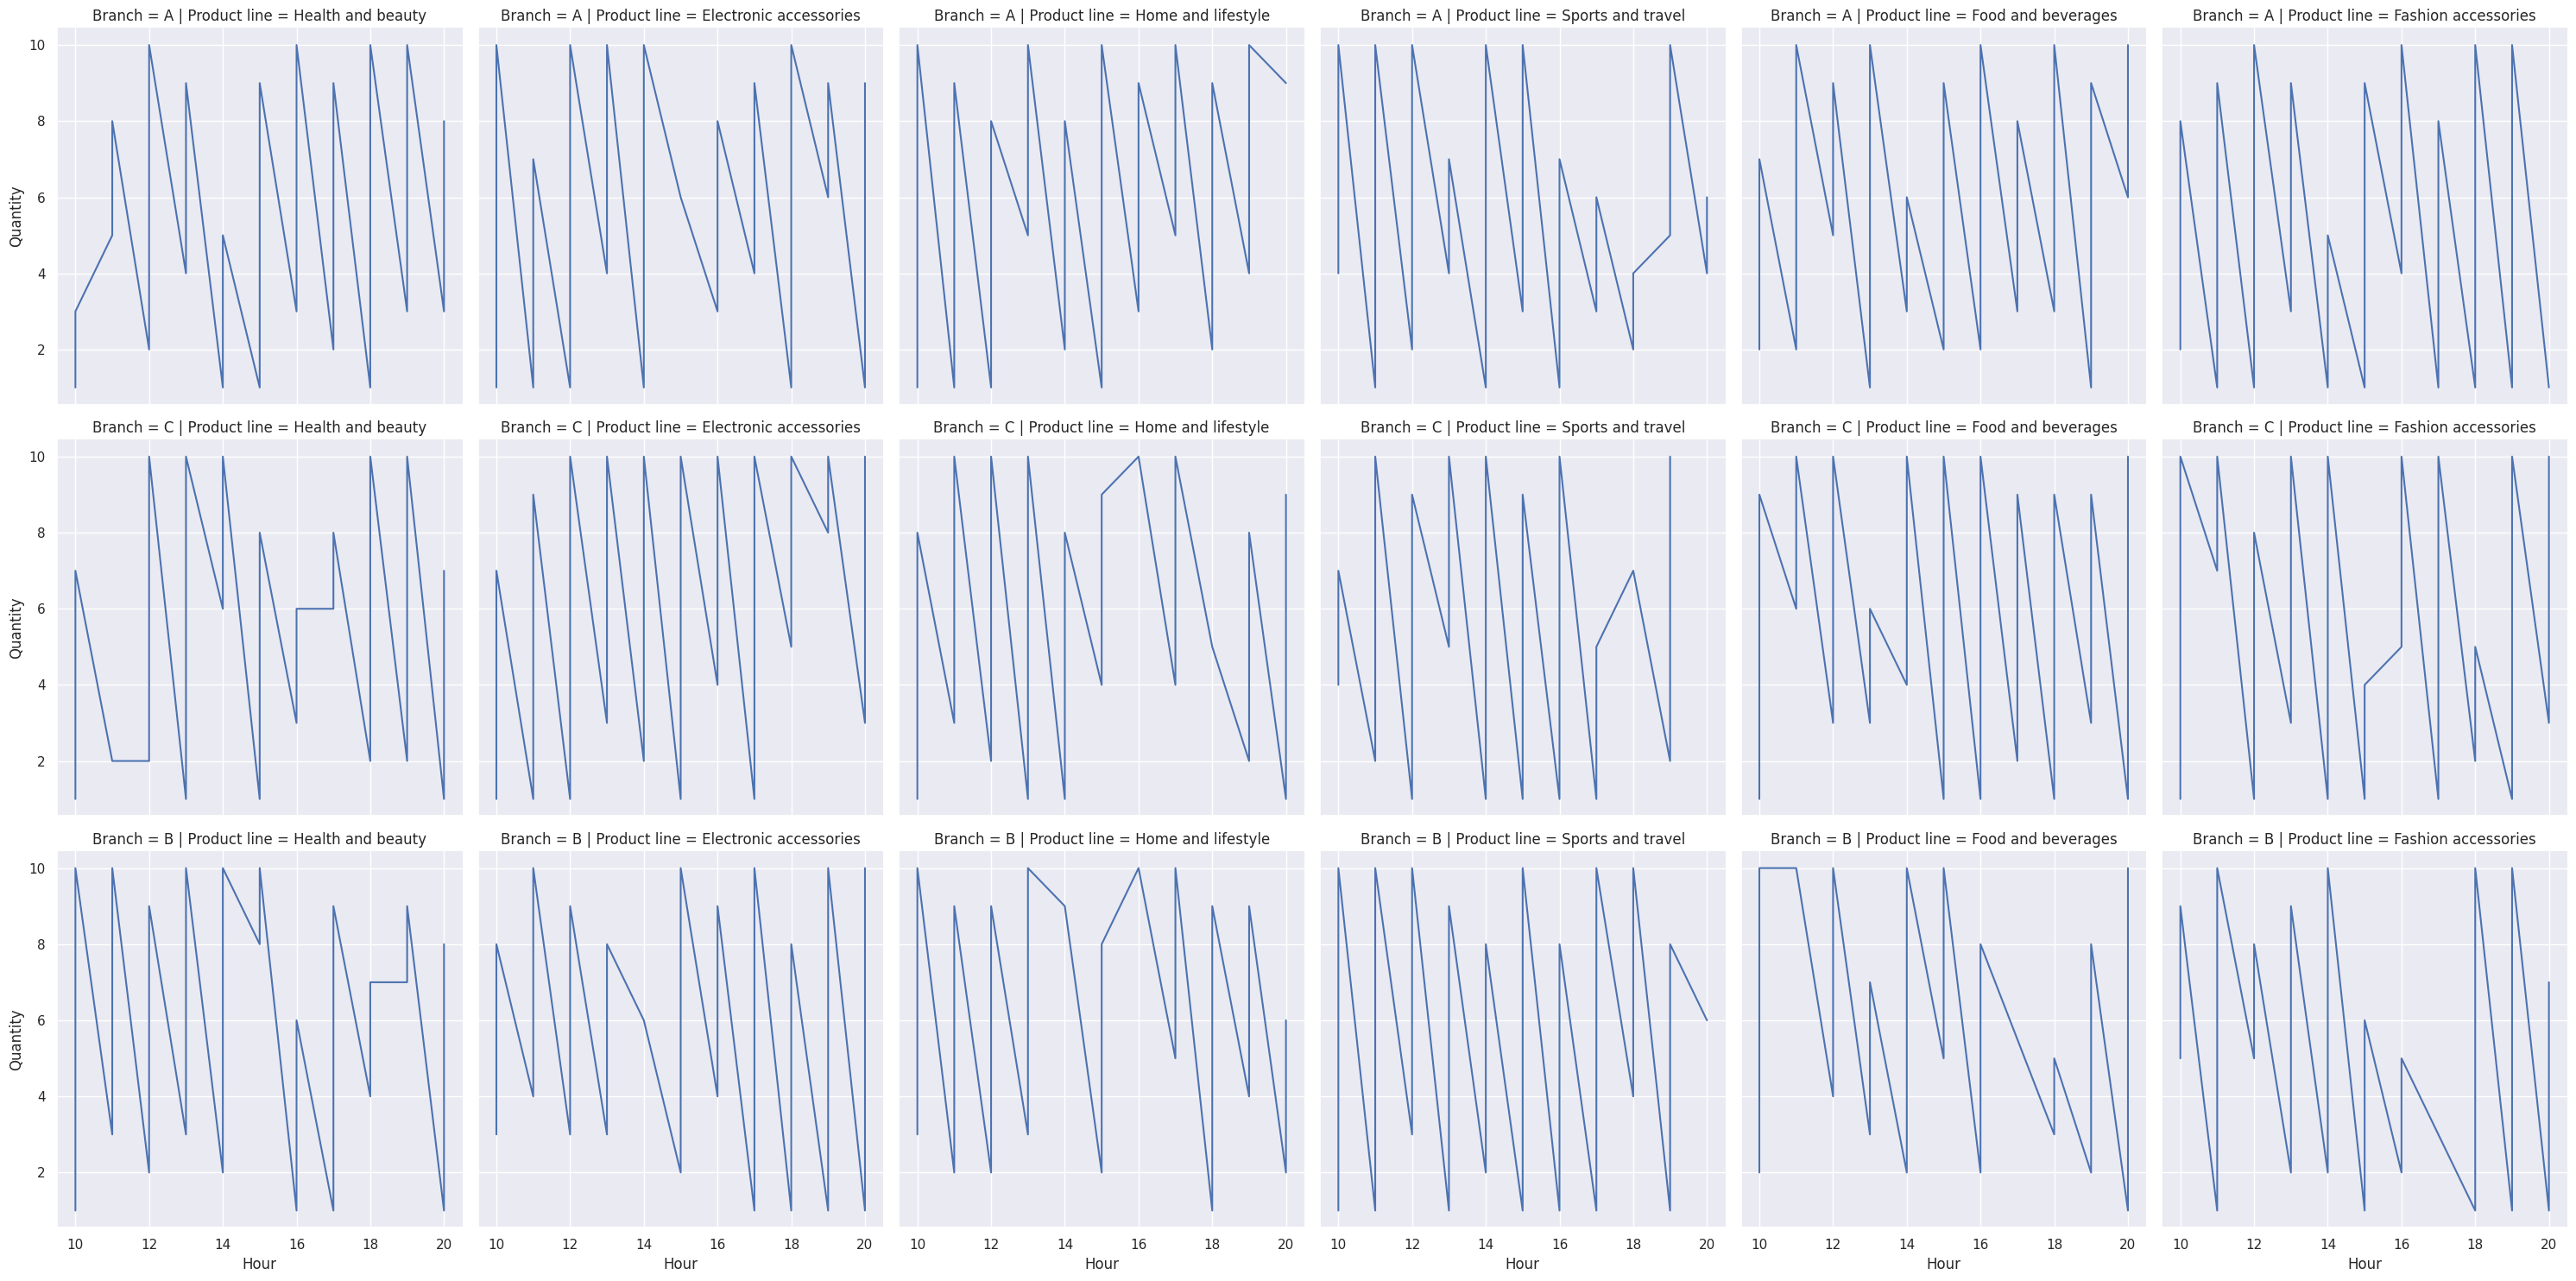

In [55]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

From the above plots, we can see that food and beverages sales usually high in all three branches al evening especially around 19:00

## Payment Channel

Let see how customers make payment in this business

In [56]:
sales['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

<Axes: xlabel='Payment', ylabel='count'>

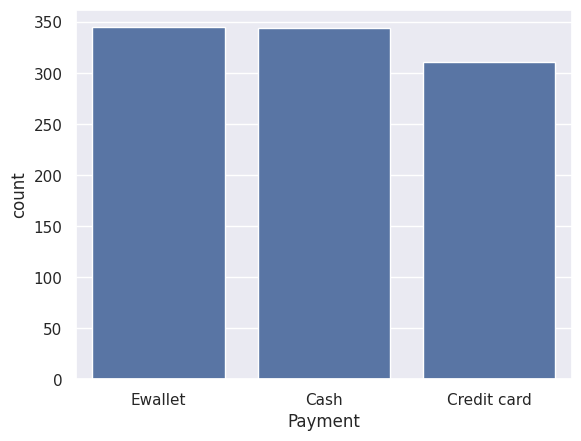

In [58]:
sns.countplot(x='Payment',data=sales)

Most of the customers pay through the Ewallet and Cash payment while under 40 percent of them apy with their credit card.we would also like to see this payment type distribution across all the branches

<Axes: xlabel='Payment', ylabel='count'>

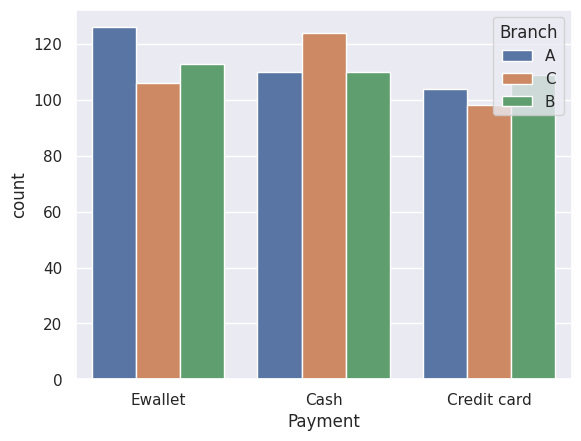

In [59]:
sns.countplot(x='Payment',hue='Branch',data=sales)

## Customer Analysis

From inspection,there are two types of customers Members and Normal. let's see how many they are and where they are

In [60]:
sales['Customer type'].nunique()

2

In [61]:
sales['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

<Axes: xlabel='Customer type', ylabel='count'>

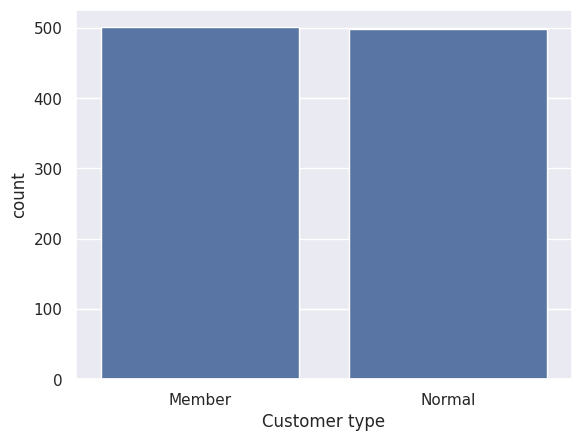

In [62]:
sns.countplot(x='Customer type',data=sales)

Text(0.5, 1.0, 'Customer type by Branch')

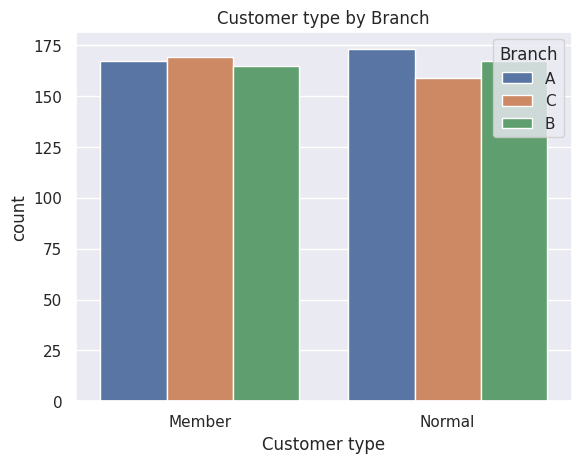

In [64]:
sns.countplot(x='Customer type',hue='Branch',data=sales).set_title('Customer type by Branch')

## Does customer type influences the sales


In [65]:
sales.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

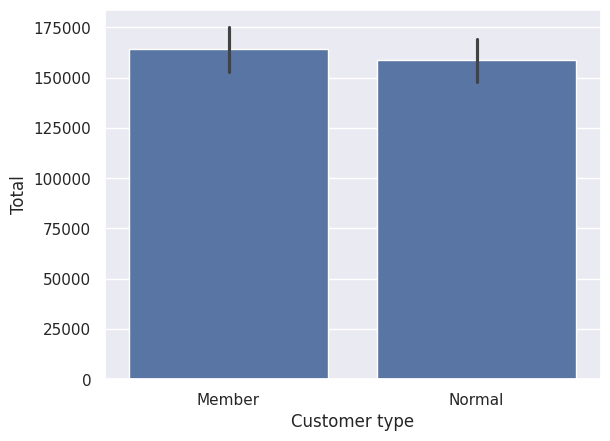

In [66]:
sns.barplot(x='Customer type', y='Total',estimator=sum,data=sales)

Text(0.5, 1.0, 'Customer type')

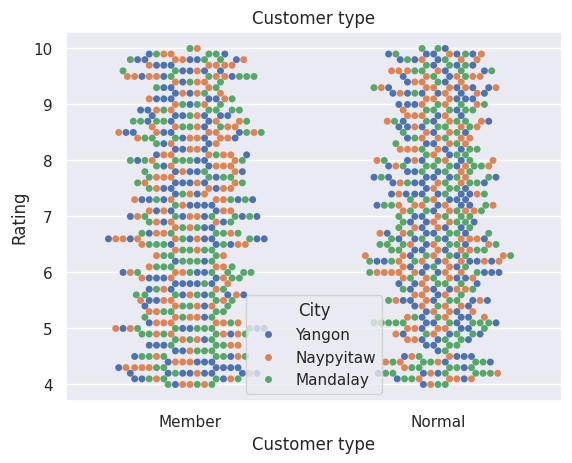

In [67]:
sns.swarmplot(x='Customer type',y='Rating',hue='City',data=sales).set_title('Customer type')

With the use of google search, I was able to get the longitude and latitude of each cities. We can

In [68]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

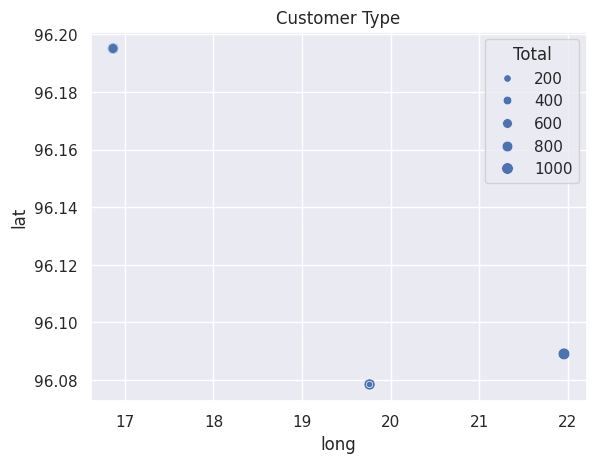

In [69]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type")

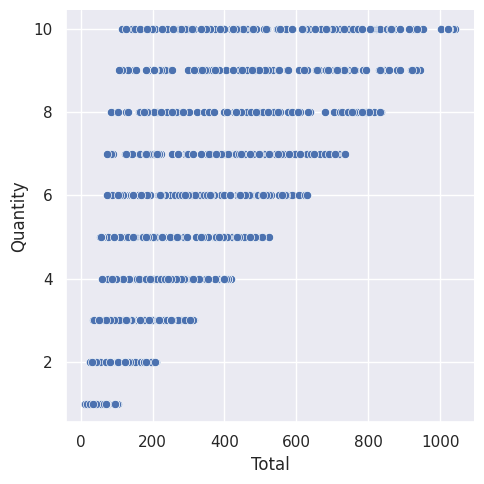

In [70]:
sns.relplot(x='Total',y='Quantity',data=sales)